# Title: Credit Card Fraud Detection

#### Group Member Names : Priyannk Bhaveshbhai Siddhapura and Blesslin Thomas



### INTRODUCTION:
Credit card fraud detection is crucial due to its growing prevalence. Traditional methods struggle with imbalanced datasets, where minority fraud cases are vital. Using oversampling to address this, combined with denoising autoencoders, improves classification accuracy, enabling effective detection in the finance industry, where security challenges persist amidst increasing transactions. We further plan to use different balancing method.
*********************************************************************************************************************
#### AIM :
To increase the recall and f1-score for the model by implemening SMOTEE balancing method. Also, compare Autoencoder model with XGBoost algorithm.

*********************************************************************************************************************
#### Github Repo: https://github.com/Priyank-0704/MLP_final_project

*********************************************************************************************************************
#### DESCRIPTION OF PAPER:
The paper addresses imbalanced data classification in credit card fraud detection using a denoising autoencoder (DAE) neural network. The proposed method combines oversampling for minority class enhancement and DAE for noise removal and robust feature extraction. Experiments demonstrate improved classification accuracy on imbalanced datasets compared to traditional methods. The approach highlights its potential for detecting fraudulent transactions in highly skewed datasets.

*********************************************************************************************************************
#### PROBLEM STATEMENT :
The paper focuses on gaining high recall value; however, misses out the importance of precision and f1-score which are imperative metrics while dealing with fraud detection problem. Also, highly imbalanced datset needs to be handle by applying appropriate balancing techniques or choosing a model which is good at handling imbalanced dataset.

*********************************************************************************************************************
#### CONTEXT OF THE PROBLEM:
*
Fraud detection is a critical application of machine learning, particularly in domains like credit card transactions. The inherent class imbalance in such datasets, where fraudulent cases are rare, poses a significant challenge. While maximizing recall is essential to minimize false negatives, it is equally important to balance precision and F1-score to ensure a robust model that minimizes false positives. Addressing this requires effective balancing techniques and model selection strategies.
*********************************************************************************************************************
#### SOLUTION:
*
Potential solution might be using different balancing techniques such as random or clustered undersampling method; or combination of oversampling and undersampling. These alternate option might efficiently increase the precision and f1-score evaluation metrics for the autoencoder model. Moreover, using XGBoost model as it is robust to imbalanced dataset.


# Background
*********************************************************************************************************************


|Reference|Explanation|Dataset/Input|Weakness|
|------|------|------|------|
|Paper Reference : https://arxiv.org/pdf/1908.11553v1|The dataset contain fraud and non-fraud transaction details |Dataset : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data|Imbalanced dataset|


*********************************************************************************************************************






# Implement paper code :
*********************************************************************************************************************

*



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, recall_score
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# class = 1 --> Fraud
#class = 0 --> Not Fraud

#Gives count of positive and negative labels
np.bincount(df['Class'])

array([284315,    492])

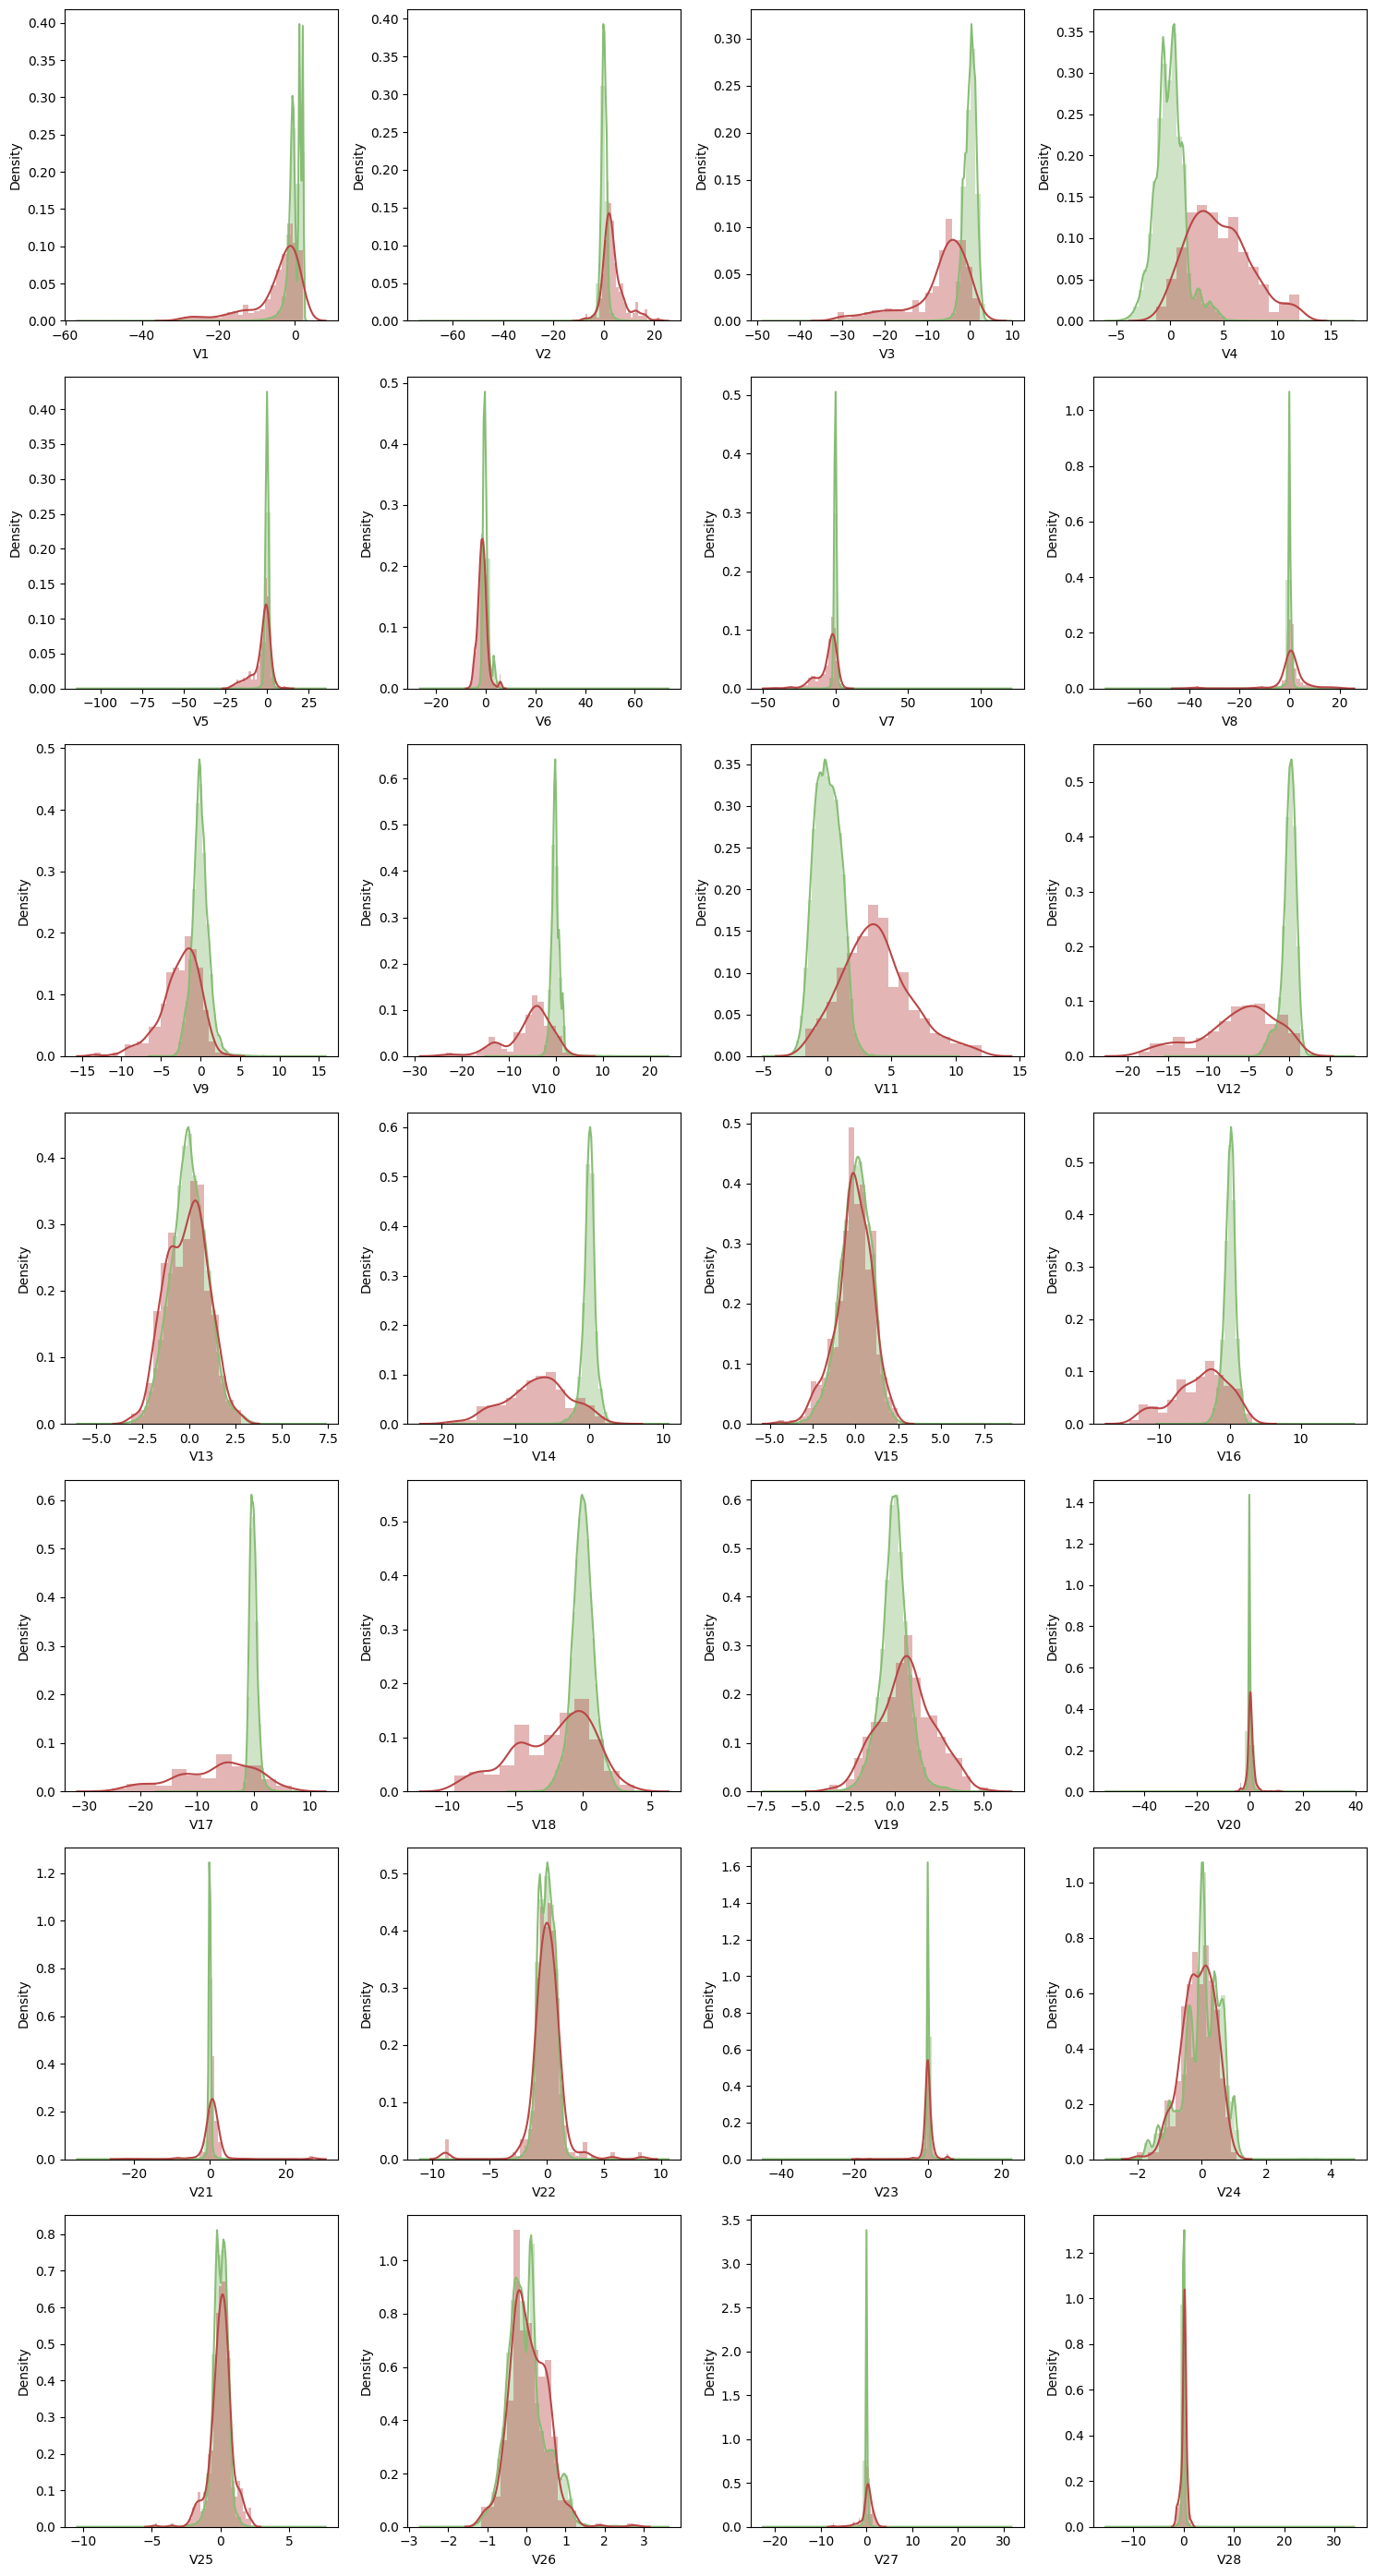

In [ ]:
cols = df.columns.drop(['Time', 'Amount', 'Class'])

f, ax = plt.subplots(7, 4, figsize = (15, 28))

for i, c in zip(ax.flatten(), cols):
    sns.distplot(df[c][df['Class'] == 0], color = '#87bd75', ax = i)
    sns.distplot(df[c][df['Class'] == 1], color = '#b94646', ax = i)
f.tight_layout()

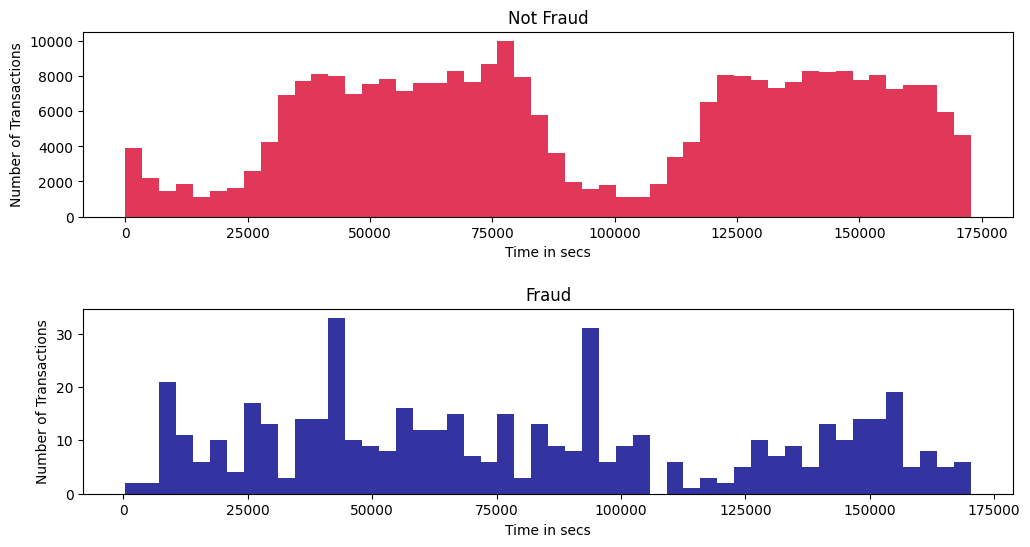

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 6))
plt.subplots_adjust(hspace = 0.5)
ax1.hist(df['Time'][df['Class'] == 0], bins = 50, color = 'crimson' ,alpha = 0.85)

ax1.set_xlabel('Time in secs')
ax1.set_title('Not Fraud')
ax1.set_ylabel('Number of Transactions')


ax2.hist(df["Time"][df['Class'] == 1], bins = 50, color = 'darkblue', alpha = 0.8)

ax2.set_xlabel('Time in secs')
ax2.set_ylabel("Number of Transactions")
ax2.set_title('Fraud')
plt.show()

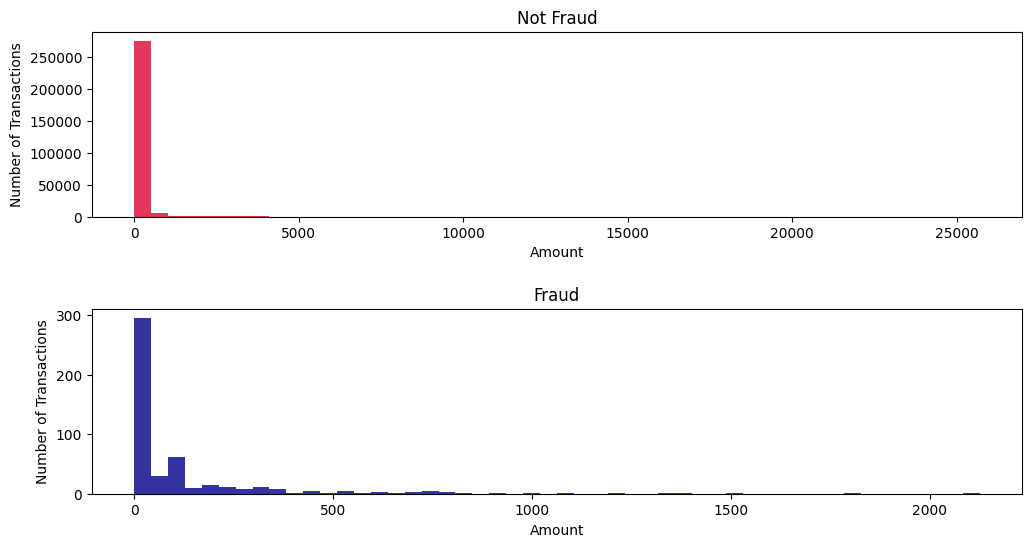

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 6))
plt.subplots_adjust(hspace = 0.5)
ax1.hist(df['Amount'][df['Class'] == 0], bins = 50, color = 'crimson' ,alpha = 0.85)
ax1.set_xlabel('Amount')
ax1.set_title('Not Fraud')
ax1.set_ylabel('Number of Transactions')


ax2.hist(df["Amount"][df['Class'] == 1], bins = 50, color = 'darkblue', alpha = 0.8)
ax2.set_xlabel('Amount')
ax2.set_ylabel("Number of Transactions")
ax2.set_title('Fraud')
plt.show()

In [ ]:
X = df.drop(['Time', 'Class'], axis = 1)
y = df['Class']

In [ ]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train)

In [ ]:
def is_balanced_splitting(y):
    counts = np.bincount(y)
    return counts[1] / (sum(counts))

In [ ]:
print('Percentage of FRAUD instances in Training Set : {}'.format(is_balanced_splitting(y_train) * 100))
print('Percentage of FRAUD instances in Testing Set : {}'.format(is_balanced_splitting(y_test) * 100))
print('Percentage of FRAUD instances in Validation set : {}'.format(is_balanced_splitting(y_valid) * 100))

Percentage of FRAUD instances in Training Set : 0.17281485220215498
Percentage of FRAUD instances in Testing Set : 0.17204452090867595
Percentage of FRAUD instances in Validation set : 0.1733634707805745


In [ ]:
X_train.shape

(182276, 29)

### Oversampling

In [ ]:
def oversampling(X_train, y_train):
# Oversampling the imbalanced dataset
    oversample = SMOTE(random_state = 42, sampling_strategy = 0.4)
    X, y = oversample.fit_resample(X_train, y_train)
    # summarize the new class distribution
    counter = Counter(y)
    print(counter)
    return X, y
    # scatter plot of examples by class label


In [ ]:
X_train, y_train = oversampling(X_train, y_train)

Counter({0: 181961, 1: 72784})


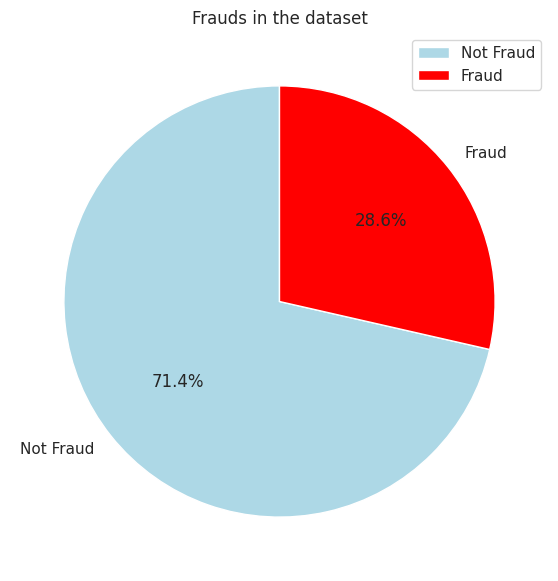

In [ ]:
sns.set(style="whitegrid")
labels = ['Not Fraud', 'Fraud']
sizes = y_train.value_counts()

colors = ["lightblue","red"]


plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,)

plt.title('Frauds in the dataset')
plt.legend()
plt.show()

### Adding Gausian noise

In [ ]:
#Adding Gaussian Noise

def add_noise(X_train):
    mean = 0
    sigma = 0.1
    noise = np.random.normal(mean, sigma ,X_train.shape)
    X_train = X_train + noise
    return X_train

In [ ]:
X_train_noised = add_noise(X_train)

In [ ]:
y_train = np.array(y_train).reshape(-1, 1)
y_valid = np.array(y_valid).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

### Autoencoder Model

In [ ]:
epochs = 25
batch_size = 128
input_shape = X_train.shape[1] #num of columns, 29
lr = 1e-7

#Autoencoder Model
input_layer = keras.layers.Input(shape=(input_shape, ))
encoder = keras.layers.Dense(128, activation = "relu", activity_regularizer = keras.regularizers.l1(lr),
                             kernel_initializer = 'lecun_normal')(input_layer)
encoder = keras.layers.Dense(64, activation = "relu")(encoder)
encoder = keras.layers.Dense(32, activation = 'relu')(encoder)
decoder = keras.layers.Dense(32, activation = 'relu')(encoder)
decoder = keras.layers.Dense(64, activation = 'relu')(decoder)
decoder = keras.layers.Dense(128, activation = 'relu')(decoder)
decoder = keras.layers.Dense(29, activation = 'relu')(decoder)
autoencoder = keras.Model(inputs=input_layer, outputs=decoder)

In [ ]:
autoencoder.compile(metrics = ['accuracy'],
                    loss = 'mean_squared_error',
                    optimizer = 'adam')


history = autoencoder.fit(X_train_noised, X_train_noised,
                    epochs = epochs,
                    batch_size = batch_size,
                    shuffle = True,
                    validation_data = (X_valid, X_valid),
                    verbose=1).history

Epoch 1/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5453 - loss: 6.7571 - val_accuracy: 0.6920 - val_loss: 0.7278
Epoch 2/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7439 - loss: 6.5544 - val_accuracy: 0.7041 - val_loss: 0.7230
Epoch 3/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7556 - loss: 6.5646 - val_accuracy: 0.7161 - val_loss: 0.7198
Epoch 4/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7627 - loss: 6.5834 - val_accuracy: 0.7225 - val_loss: 0.7192
Epoch 5/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7629 - loss: 6.5765 - val_accuracy: 0.6169 - val_loss: 0.7747
Epoch 6/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7109 - loss: 6.5793 - val_accuracy: 0.7200 - val_loss: 0.7173
Epoch 7/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7698 - loss: 6.5694 - val_accuracy: 0.7189 - val_loss: 0.7152
Epoch 8/25
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7747 - loss: 6.5703

In [ ]:
denoised_data = autoencoder.predict(X_train_noised)

7961/7961 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


### Fraud Detector Model

In [ ]:
epochs = 25
batch_size = 256
input_shape = X_train.shape[1] #num of columns, 29


input_layer = keras.layers.Input(shape = (input_shape, ))
layer_1 = keras.layers.Dense(128, activation = "relu",
                            kernel_initializer = 'lecun_normal')(input_layer)
layer_2 = keras.layers.Dense(64, activation = "relu", kernel_initializer = 'lecun_normal')(layer_1)
layer_3 = keras.layers.Dense(32, activation = 'relu', kernel_initializer = 'lecun_normal')(layer_2)
layer_4 = keras.layers.Dense(16, activation = 'relu', kernel_initializer = 'lecun_normal')(layer_3)
output_layer = keras.layers.Dense(2, activation = 'sigmoid')(layer_4)
fraud_dtr = keras.Model(inputs = input_layer, outputs = output_layer)

In [ ]:
fraud_dtr.compile(metrics=['accuracy'],
                    loss='binary_crossentropy',
                    optimizer='sgd')

callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.keras',
                                          save_best_only = True)

history = fraud_dtr.fit(denoised_data, y_train,
                    epochs = epochs,
                    batch_size  = 256,
                    validation_data = (X_valid, y_valid),
                    callbacks = [callback]).history

Epoch 1/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8209 - loss: 0.5737 - val_accuracy: 0.9828 - val_loss: 0.2801
Epoch 2/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9491 - loss: 0.2207 - val_accuracy: 0.9807 - val_loss: 0.1036
Epoch 3/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9527 - loss: 0.1484 - val_accuracy: 0.9737 - val_loss: 0.1095
Epoch 4/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9554 - loss: 0.1366 - val_accuracy: 0.9690 - val_loss: 0.1225
Epoch 5/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9566 - loss: 0.1286 - val_accuracy: 0.9661 - val_loss: 0.1331
Epoch 6/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9577 - loss: 0.1230 - val_accuracy: 0.9622 - val_loss: 0.1481
Epoch 7/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9595 - loss: 0.1172 - val_accuracy: 0.9661 - val_loss: 0.1335
Epoch 8/25
996/996 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9602 - loss: 0.1110 - val_accuracy: 0.

In [ ]:

#Load the best saved model

model = keras.models.load_model('Fraud_Detector_model.keras')

In [ ]:
model.evaluate(X_test, y_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9797 - loss: 0.1057


[0.10450843721628189, 0.9797408580780029]

In [ ]:
preds = model.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


### ROC-AUC Curve

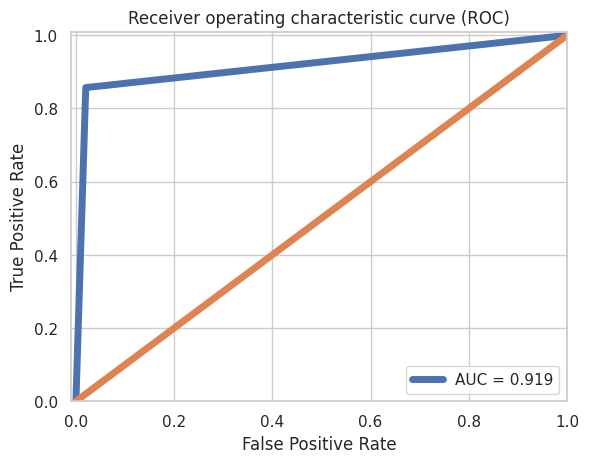

In [ ]:
#Plotting the ROC-AUC Curve

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test.argmax(axis = 1), preds.argmax(axis = 1))
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth = 5, label = 'AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth = 5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print('Percentage of correctly predicting the Fraud Transactions : ', recall_score(y_test.argmax(axis = 1), preds.argmax(axis = 1)) * 100, '%')

Percentage of correctly predicting the Fraud Transactions :  85.71428571428571 %


*********************************************************************************************************************
### Contribution  Code :
*

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report

# Get the predicted probabilities
y_predict_proba = model.predict(X_test)

y_predict_proba_class1 = y_predict_proba[:, 1]

y_t = y_test[:, 1]
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_t, y_predict_proba_class1)
print(f"ROC-AUC Score: {roc_auc}")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
ROC-AUC Score: 0.9470770933584464


In [ ]:
# Convert probabilities to binary labels using a threshold
y_pred = (y_predict_proba_class1 > 0.5).astype(int)

print(classification_report(y_t, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     56864
         1.0       0.07      0.89      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.56     56962
weighted avg       1.00      0.98      0.99     56962



### Undesampling and Oversampling

In [ ]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X, y, test_size = 0.2, stratify = y)
X_train_sm, X_valid_sm, y_train_sm, y_valid_sm = train_test_split(X_train_sm, y_train_sm, test_size = 0.2, stratify = y_train_sm)

In [ ]:
print('Percentage of FRAUD instances in Training Set : {}'.format(is_balanced_splitting(y_train_sm) * 100))
print('Percentage of FRAUD instances in Testing Set : {}'.format(is_balanced_splitting(y_test_sm) * 100))
print('Percentage of FRAUD instances in Validation set : {}'.format(is_balanced_splitting(y_valid_sm) * 100))

Percentage of FRAUD instances in Training Set : 0.17281485220215498
Percentage of FRAUD instances in Testing Set : 0.17204452090867595
Percentage of FRAUD instances in Validation set : 0.1733634707805745


In [ ]:
y_train_sm.value_counts()

,count
Class,
0,181961
1,315


In [ ]:
# importing required library for SMOTEENN balancing technique
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_sm, y_train_sm = smote_enn.fit_resample(X_train_sm, y_train_sm)

In [ ]:
y_train_sm.value_counts()

,count
Class,
1,181961
0,181693


In [ ]:
# Adding Gaussian Noise

def add_noise(X_train):
    mean = 0
    sigma = 0.1
    noise = np.random.normal(mean, sigma ,X_train.shape)
    X_train = X_train + noise
    return X_train

In [ ]:
X_train_sm_noised = add_noise(X_train_sm)

In [ ]:
y_train_sm = np.array(y_train_sm).reshape(-1, 1)
y_valid_sm = np.array(y_valid_sm).reshape(-1, 1)
y_test_sm = np.array(y_test_sm).reshape(-1, 1)

In [ ]:
y_train_sm = to_categorical(y_train_sm)
y_test_sm = to_categorical(y_test_sm)
y_valid_sm = to_categorical(y_valid_sm)

In [ ]:
epochs = 25
batch_size = 128
input_shape = X_train_sm.shape[1]
lr = 1e-7

#Autoencoder Model
input_layer = keras.layers.Input(shape=(input_shape, ))
encoder = keras.layers.Dense(128, activation = "relu", activity_regularizer = keras.regularizers.l1(lr),
                             kernel_initializer = 'lecun_normal')(input_layer)
encoder = keras.layers.Dense(64, activation = "relu")(encoder)
encoder = keras.layers.Dense(32, activation = 'relu')(encoder)
decoder = keras.layers.Dense(32, activation = 'relu')(encoder)
decoder = keras.layers.Dense(64, activation = 'relu')(decoder)
decoder = keras.layers.Dense(128, activation = 'relu')(decoder)
decoder = keras.layers.Dense(29, activation = 'relu')(decoder)
autoencoder = keras.Model(inputs=input_layer, outputs=decoder)

In [ ]:
autoencoder.compile(metrics = ['accuracy'],
                    loss = 'mean_squared_error',
                    optimizer = 'adam')


history = autoencoder.fit(X_train_sm_noised, X_train_sm_noised,
                    epochs = epochs,
                    batch_size = batch_size,
                    shuffle = True,
                    validation_data = (X_valid_sm, X_valid_sm),
                    verbose=1).history

Epoch 1/25
2842/2842 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.6719 - loss: 12.0180 - val_accuracy: 0.7808 - val_loss: 0.7094
Epoch 2/25
2842/2842 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8602 - loss: 11.8080 - val_accuracy: 0.8008 - val_loss: 0.6921
Epoch 3/25
2842/2842 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8763 - loss: 11.7894 - val_accuracy: 0.8408 - val_loss: 0.6852
Epoch 4/25
2842/2842 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8849 - loss: 11.7922 - val_accuracy: 0.8314 - val_loss: 0.6843
Epoch 5/25
2842/2842 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8891 - loss: 11.8143 - val_accuracy: 0.8440 - val_loss: 0.6823
Epoch 6/25
2842/2842 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8928 - loss: 11.7622 - val_accuracy: 0.8495 - val_loss: 0.6856
Epoch 7/25
2842/2842 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8966 - loss: 11.8248 - val_accuracy: 0.8492 - val_loss: 0.6808
Epoch 8/25
2842/2842 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8988 - 

In [ ]:
denoised_data_sm = autoencoder.predict(X_train_sm_noised)

11365/11365 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


In [ ]:
epochs = 25
batch_size = 256
input_shape = X_train.shape[1] #num of columns, 29


input_layer = keras.layers.Input(shape = (input_shape, ))
layer_1 = keras.layers.Dense(128, activation = "relu",
                            kernel_initializer = 'lecun_normal')(input_layer)
layer_2 = keras.layers.Dense(64, activation = "relu", kernel_initializer = 'lecun_normal')(layer_1)
layer_3 = keras.layers.Dense(32, activation = 'relu', kernel_initializer = 'lecun_normal')(layer_2)
layer_4 = keras.layers.Dense(16, activation = 'relu', kernel_initializer = 'lecun_normal')(layer_3)
output_layer = keras.layers.Dense(2, activation = 'sigmoid')(layer_4)
fraud_dtr = keras.Model(inputs = input_layer, outputs = output_layer)

In [ ]:
fraud_dtr.compile(metrics=['accuracy'],
                    loss='binary_crossentropy',
                    optimizer='sgd')

callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model_sm.keras',
                                          save_best_only = True)

history = fraud_dtr.fit(denoised_data_sm, y_train_sm,
                    epochs = epochs,
                    batch_size  = 256,
                    validation_data = (X_valid_sm, y_valid_sm),
                    callbacks = [callback]).history

Epoch 1/25
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8815 - loss: 0.3456 - val_accuracy: 0.9404 - val_loss: 0.1892
Epoch 2/25
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9434 - loss: 0.1532 - val_accuracy: 0.9527 - val_loss: 0.1669
Epoch 3/25
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9524 - loss: 0.1246 - val_accuracy: 0.9537 - val_loss: 0.1648
Epoch 4/25
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9607 - loss: 0.1023 - val_accuracy: 0.9534 - val_loss: 0.1662
Epoch 5/25
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9687 - loss: 0.0823 - val_accuracy: 0.9533 - val_loss: 0.1717
Epoch 6/25
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9765 - loss: 0.0662 - val_accuracy: 0.9506 - val_loss: 0.1889
Epoch 7/25
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9825 - loss: 0.0536 - val_accuracy: 0.9597 - val_loss: 0.1623
Epoch 8/25
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9858 - loss: 0.0441 - 

In [ ]:
#Load the best saved model
model = keras.models.load_model('Fraud_Detector_model_sm.keras')

In [ ]:
preds_sm = model.predict(X_test_sm)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


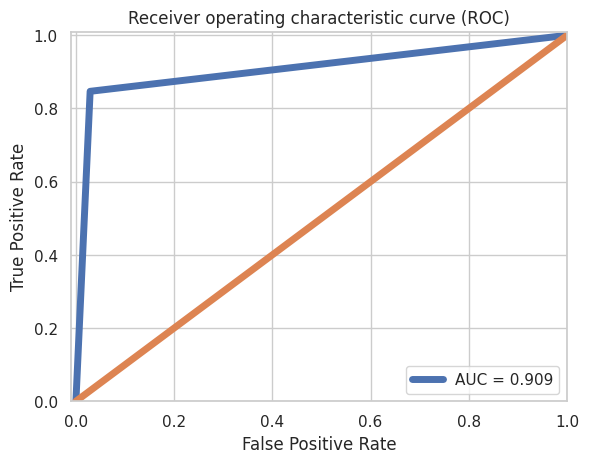

In [ ]:
#Plotting the ROC-AUC Curve

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test_sm.argmax(axis = 1), preds_sm.argmax(axis = 1))
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth = 5, label = 'AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth = 5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print('Percentage of correctly predicting the Fraud Transactions : ', recall_score(y_test_sm.argmax(axis = 1), preds_sm.argmax(axis = 1)) * 100, '%')

Percentage of correctly predicting the Fraud Transactions :  84.6938775510204 %


In [ ]:
# Get the predicted probabilities
y_predict_proba_sm = model.predict(X_test_sm)

y_predict_proba_class1_sm = y_predict_proba_sm[:, 1]

y_t_sm = y_test_sm[:, 1]
# Calculate ROC-AUC score
roc_auc_sm = roc_auc_score(y_t_sm, y_predict_proba_class1_sm)
print(f"ROC-AUC Score: {roc_auc_sm}")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
ROC-AUC Score: 0.9512788479207102


In [ ]:
# Convert probabilities to binary labels using a threshold
y_pred_sm = (y_predict_proba_class1_sm > 0.5).astype(int)

print(classification_report(y_t_sm, y_pred_sm))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     56864
         1.0       0.05      0.85      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.91      0.54     56962
weighted avg       1.00      0.97      0.98     56962



### XGBoost Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

In [ ]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size = 0.2, stratify = y)

In [ ]:
xgb = XGBClassifier(scale_pos_weight=len(y_train_xgb[y_train_xgb == 0]) / len(y_train_xgb[y_train_xgb == 1]), random_state=42)
xgb.fit(X_train_xgb, y_train_xgb)

y_pred_xgb = xgb.predict(X_test_xgb)
print("Precision:", precision_score(y_test_xgb, y_pred_xgb))
print("F1 Score:", f1_score(y_test_xgb, y_pred_xgb))

Precision: 0.9213483146067416
F1 Score: 0.8770053475935828


In [ ]:
print(classification_report(y_test_xgb, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.84      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
print(roc_auc_score(y_test_xgb, y_pred_xgb))

0.9183057965729904


In [ ]:
print("Accuracy : ", accuracy_score(y_test_xgb, y_pred))

Accuracy :  0.975650433622415


### Results :
SMOTEE balancing method resulted in 84.69 % recall percentage and, 0.05 and 0.09 values for precision and f1-score respectively. The XGBoost model's accuracy was 97.65 %, which is highest among all the methods used in this notebook. Also, precision, recall, and f1-score are high and acceptable for any fraud detection problem.
*******************************************************************************************************************************
#### Observations :
We observed that using combined balancing techniques of oversamplin and undersampling did not significantly contributed to the model's evaluation metrics. As recall score changed from 85.71 to 84.69, and similarly minor downward trend was noticed in precision and f1-score. On the otherhand, we got stunishing results from XGBoost alogrithm as the model accuracy was 97.56 and precision, recall, and f1-score were 0.92, 0.84, and 0.88 respectively.
*******************************************************************************************************************************
*


### Conclusion and Future Direction :
In conclusion, XGBoost is the best model for the credit card fraud datasets. It proves its robustness to imbalanced dataset by accurately prediciting fradulent transactiona and minimising the risk of false positive and false negative, at the same time. Further work can be done to explore this algorithm by performing hyperparameter tuning on the model. Also, one can try to use different balancing techniques to find best method for autoenoder.
*******************************************************************************************************************************
#### Learnings :
We got to know that XGBoost is higly robust algorithm for imbalanced dataset. Good f1-score value with our dataset proves that the model significantly managed to make less false positive and less false negative predictions. However, this was missing in the autoencoder model.

*******************************************************************************************************************************
#### Results Discussion :
The results indicate that XGBoost outperformed other models in detecting fraudulent transactions, achieving a high F1-score and maintaining a good balance between precision and recall. This highlights its robustness to the imbalanced nature of the dataset, effectively reducing both false positives and false negatives.

On the other hand, the autoencoder model, despite being designed for anomaly detection, struggled with imbalanced data, leading to lower precision and recall metrics. The performance difference underscores the importance of selecting the right algorithm and balancing techniques when dealing with highly skewed datasets. Further optimization, such as hyperparameter tuning and improved balancing methods, could potentially enhance the performance of all models tested.

*******************************************************************************************************************************
#### Limitations :
we had computational limitation as we were not able to run cluster-based undersampling method. It took more than 6-7 hours and still the algorithm was running.

*******************************************************************************************************************************
#### Future Extension :
We believe one should bothe the balancing method, smote for oversampling and cluster method for undersampling because it might provide astonishinig results. Also, this fraud dataset can be pretended as anaomly detection problem and use Isolation forest algorithm.

# References:

### Note: We have copy pasted below references from the paper itself.

[1] Y. Sahin, S. Bulkan, and E. Duman, “A cost-sensitive decision
tree approach for fraud detection,” Expert Systems with
Applications,vol. 40, pp. 5916-5923, 2013.

[2] Ogwueleka, F. N., (2011). Data Mining Application in Credit
Card Fraud Detection System, Journal of Engineering Science and
Technology, Vol. 6, No. 3, pp. 311 – 322

[3] Ng, A. Y., and Jordan, M. I., (2002). On discriminative vs.
generative classifiers: A comparison of logistic regression and naive
bayes. Advances in neural information processing systems, 2, 841-
848.

[4] Maes, S., Tuyls, K., Vanschoenwinkel, B., & Manderick, B.
(2002). Credit card fraud detection using Bayesian and neural
networks. In Proceedings of the 1st international naiso congress on
neuro fuzzy technologies (pp. 261-270).

[5] Shen, A., Tong, R., & Deng, Y. (2007). Application of
classification models on credit card fraud detection. In Service
Systems and Service Management, 2007 International Conference
on (pp. 1-4). IEEE.

[6] Bhattacharyya, S., Jha, S., Tharakunnel, K., & Westland, J. C.
(2011). Data mining for credit card fraud: A comparative study.
Decision Support Systems, 50(3), 602-613.

[7] Sahin, Y. and Duman, E., (2011). Detecting credit card fraud by
ANN and logistic regression. In Innovations in Intelligent Systems
and Applications (INISTA), 2011 International Symposium on (pp.
315-319). IEEE.

[8] Autoencoder for Words, Liou, C.-Y., Cheng, C.-W., Liou, J.-W.,
and Liou, D.-R., Neurocomputing, Volume 139, 84–96 (2014),
doi:10.1016/j.neucom.2013.09.055

[9] M. Koziarski and M. Wożniak, "CCR: A combined cleaning and
resampling algorithm for imbalanced data classification",
International Journal of Applied Mathematics and Computer
Science, vol. 27, no. 4, 2017.